<a href="https://colab.research.google.com/github/Bigsefy001/Handwritten-Digit-Recognition-using-CNN-and-MNIST-with-Custom-Image-Testing/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_test.shape

(10000, 28, 28)

In [14]:
import tensorflow as tf
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 101s 103ms/step - accuracy: 0.7466 - loss: 0.8223 - val_accuracy: 0.9762 - val_loss: 0.0777
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accuracy: 0.9537 - loss: 0.1537 - val_accuracy: 0.9799 - val_loss: 0.0667
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 99ms/step - accuracy: 0.9674 - loss: 0.1115 - val_accuracy: 0.9873 - val_loss: 0.0475
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 99ms/step - accuracy: 0.9704 - loss: 0.1015 - val_accuracy: 0.9866 - val_loss: 0.0466
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 101ms/step - accuracy: 0.9746 - loss: 0.0835 - val_accuracy: 0.9871 - val_loss: 0.0432
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 102ms/step - accuracy: 0.9773 - loss: 0.0750 - val_accuracy: 0.9902 - val_loss: 0.0399
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 102ms/step - accuracy: 0.9794 - loss: 0.0732 - val_accuracy: 0.9899 - val_loss: 0.0397
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accuracy: 0.9805 - loss:

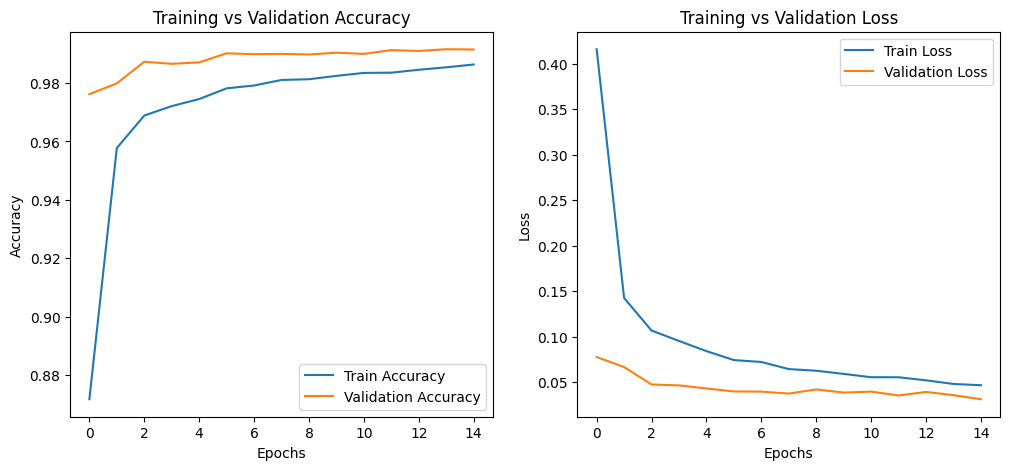

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize input
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build CNN with Dropout and Batch Normalization
model = tf.keras.models.Sequential([
    # First Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout to prevent overfitting

    # Second Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout

    # Third Convolutional Layer (hidden layer)
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout

    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout for the dense layer

    # Output Layer
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation data
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [18]:
# Save the entire model
model.save("mnist_cnn_model.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
0.jpg → Predicted: 0, Actual: 0


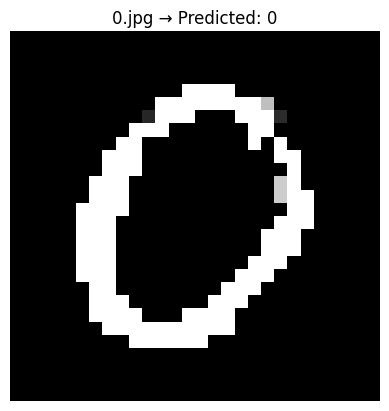

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1.jpg → Predicted: 1, Actual: 1


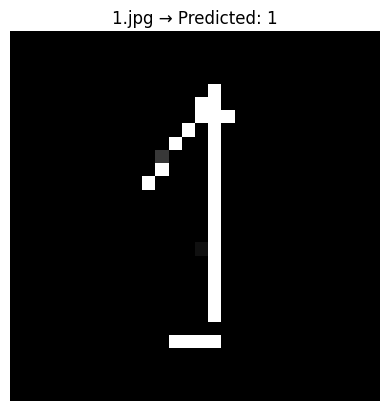

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2.jpg → Predicted: 7, Actual: 2


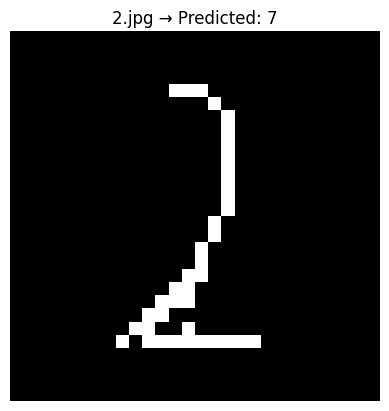

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3.jpg → Predicted: 3, Actual: 3


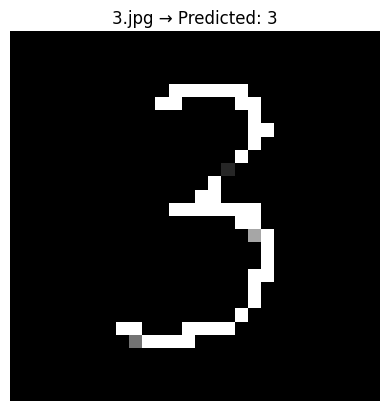

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4.jpg → Predicted: 4, Actual: 4


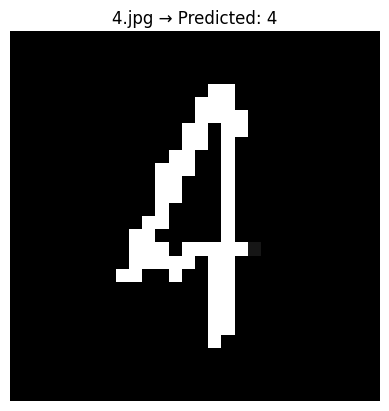

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
5.jpg → Predicted: 5, Actual: 5


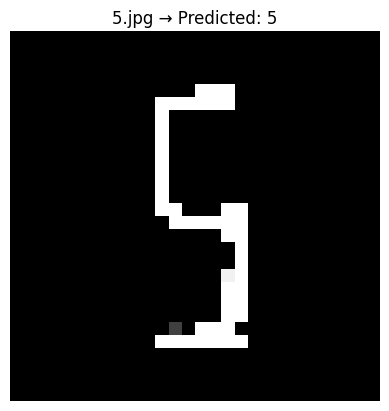

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
6.jpg → Predicted: 6, Actual: 6


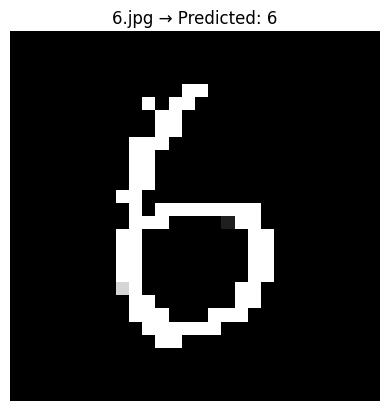

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
7.jpg → Predicted: 7, Actual: 7


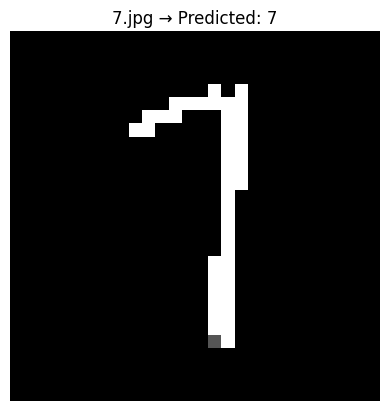

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
8.jpg → Predicted: 8, Actual: 8


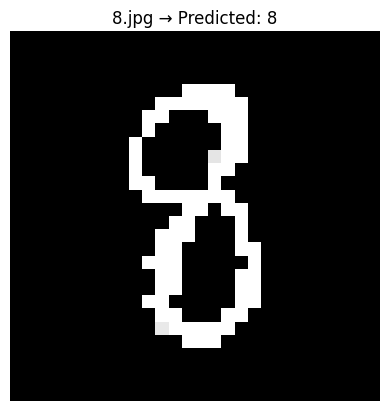

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
9.jpg → Predicted: 9, Actual: 9


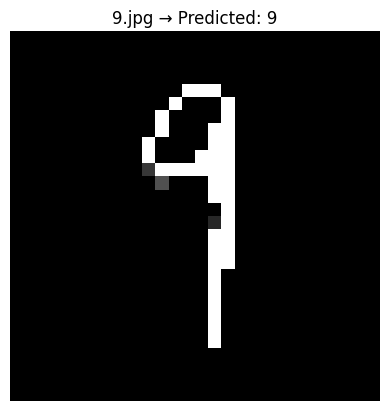

In [20]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

def preprocess_handwritten_image(path):
    # Load in grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError(f"Image at {path} could not be loaded.")

    # Invert image if background is white and digit is black
    if np.mean(img) > 127:
        img = 255 - img

    # Apply Gaussian Blur to reduce noise
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Threshold to get a clean binary image
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find bounding box of the digit
    contours, _ = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        raise ValueError("No contours found in image.")

    # Assume largest contour is the digit
    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    digit = img[y:y+h, x:x+w]

    # Resize digit to 20x20 while maintaining aspect ratio
    h, w = digit.shape
    if h > w:
        new_h = 20
        new_w = int(w * (20 / h))
    else:
        new_w = 20
        new_h = int(h * (20 / w))

    digit_resized = cv2.resize(digit, (new_w, new_h))

    # Pad to 28x28
    pad_top = (28 - digit_resized.shape[0]) // 2
    pad_bottom = 28 - digit_resized.shape[0] - pad_top
    pad_left = (28 - digit_resized.shape[1]) // 2
    pad_right = 28 - digit_resized.shape[1] - pad_left

    digit_padded = cv2.copyMakeBorder(
        digit_resized, pad_top, pad_bottom, pad_left, pad_right,
        cv2.BORDER_CONSTANT, value=0
    )

    # Normalize to [0,1] and reshape
    digit_padded = digit_padded.astype("float32") / 255.0
    digit_ready = digit_padded.reshape(1, 28, 28, 1)

    return digit_ready, digit_padded  # return both for optional display

# Load model
model = load_model("mnist_cnn_model.keras")  # or .h5

# Predict all files named 0.jpg to 9.jpg in current directory
for i in range(10):
    filename = f"{i}.jpg"
    if not os.path.exists(filename):
        print(f"{filename} not found.")
        continue

    try:
        img_for_model, img_display = preprocess_handwritten_image(filename)
        prediction = model.predict(img_for_model)
        predicted_digit = np.argmax(prediction)

        print(f"{filename} → Predicted: {predicted_digit}, Actual: {i}")

        # Optional: display the processed image
        plt.imshow(img_display, cmap='gray')
        plt.title(f"{filename} → Predicted: {predicted_digit}")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing {filename}: {e}")


In [21]:
correct = 0
total = 0

for i in range(10):
    filename = f"{i}.jpg"
    if not os.path.exists(filename):
        continue

    try:
        img_for_model, _ = preprocess_handwritten_image(filename)
        prediction = model.predict(img_for_model)
        predicted_digit = np.argmax(prediction)

        if predicted_digit == i:
            correct += 1
        total += 1
        print(f"{filename} → Predicted: {predicted_digit}, Actual: {i}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

print(f"\nHandwritten Prediction Accuracy: {correct}/{total} = {correct / total:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
0.jpg → Predicted: 0, Actual: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1.jpg → Predicted: 1, Actual: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2.jpg → Predicted: 7, Actual: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
3.jpg → Predicted: 3, Actual: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
4.jpg → Predicted: 4, Actual: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
5.jpg → Predicted: 5, Actual: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
6.jpg → Predicted: 6, Actual: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
7.jpg → Predicted: 7, Actual: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
8.jpg → Predicted: 8, Actual: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
9.jpg → Predicted: 9, Actual: 9

Handwritten Prediction Accuracy: 9/10 = 90.00%
